#Initalisering / inläsning av data

###Importer, funktioner

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import random
import time

In [ ]:
def sigma(x):
  return 1/(1+np.exp(-x))

def hmean(a, b):
  if a+b == 0:
    return 0
  
  return 2 * ((a*b)/(a+b))

def percentage(x):
  return str(round(float(x)*100, 2)).zfill(2).ljust(5, '0') + "%"

def caption(text):
  print("\n"+text+"\n\n"+50*"-"+"\n")

###Montera drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Läs in all data

In [ ]:
sizes = (100, 80, 60, 50) #, 40, 30, 25, 20, 15)

In [ ]:
# Glada gubbar (etikett 10)
print("Laddar glada gubbar...")
os.chdir('/content/drive/My Drive/GA/Data/data_happy')

data_happy = []
for size in sizes:
  f = open(str(size)+".txt")
  data_happy.append(np.array([eval(row) for row in f.readlines()]))
  f.close()

# Ledsna gubbar (etikett 01)
print("Laddar ledsna gubbar...")
os.chdir('/content/drive/My Drive/GA/Data/data_sad')

data_sad = []
for size in sizes:
  f = open(str(size)+".txt")
  data_sad.append(np.array([eval(row) for row in f.readlines()]))
  f.close()

# Neutrala bilder (inte gubbar, etikett 00)
print("Laddar bös...")
os.chdir('/content/drive/My Drive/GA/Data/data_neutral')

data_neutral = []
for size in sizes:
  f = open(str(size)+".txt")
  data_neutral.append(np.array([eval(row) for row in f.readlines()]))
  f.close()

# Generering av vita bilder (etikett 00)
print("Laddar tomma bilder...")
number_of_blanks = 100

data_blank = []
for size in sizes:
  data_blank.append(np.array([np.zeros((size,size)) for _ in range(number_of_blanks)]))

# Märkning av data
all_data = [[data_happy, (1,0)], [data_sad, (0,1)], [data_neutral, (0,0)], [data_blank, (0,0)]]

# Reservera testdata
print("Reserverar testdata...")
training_data_all_categories_all_sizes = []
test_data_all_categories_all_sizes = []
for data_all_sizes, label in all_data:

  training_data_all_sizes = []
  test_data_all_sizes = []

  random_order = random.sample(range(len(data_all_sizes[0])), len(data_all_sizes[0]))
  #random_order = range(len(data_all_sizes[0])) # OBS OBS OBS TA BORT!!!!!!

  for data in data_all_sizes:
    shuffled_data = [data[i] for i in random_order]
    #shuffled_data = random.sample(list(data), len(data))
    threshold = round(0.8*len(shuffled_data))
    training_data = shuffled_data[:threshold]
    test_data = shuffled_data[threshold:]

    training_data_all_sizes.append(training_data)
    test_data_all_sizes.append(test_data)

  training_data_all_categories_all_sizes.append([training_data_all_sizes, label])
  test_data_all_categories_all_sizes.append([test_data_all_sizes, label])

print("All data inladdad :)")

Laddar glada gubbar...
Laddar ledsna gubbar...
Laddar bös...
Laddar tomma bilder...
Reserverar testdata...
All data inladdad :)


##Felsökning (obs kör inte vid normal körning då blir det knasigt)

In [ ]:
# OBSERVERA OBS
sizes = (100, 80, 60, 50, 40, 30, 25, 20, 15)

# Neutrala bilder (inte gubbar, etikett 00)
print("Laddar bös...")
os.chdir('/content/drive/My Drive/GA/Data/data_neutral')

data_neutral = []
for size in sizes:
  print(f"Laddar {size}...")
  f = open(str(size)+".txt")
  data_neutral.append(np.array([eval(row) for row in f.readlines()]))
  f.close()

data = data_neutral
label = (0, 0)

print("Klart!")

Laddar bös...
Laddar 100...
Laddar 80...
Laddar 60...
Laddar 50...
Laddar 40...
Laddar 30...
Laddar 25...
Laddar 20...
Laddar 15...
Klart!


##Testa datan

In [ ]:
data, label = training_data_all_categories_all_sizes[1]

###Info om datan

In [ ]:
# Exempel: info om datan
for i in range(len(sizes)):
  size = sizes[i]
  count = len(data[i])
  print(f"{count} bilder i storlek {size}x{size}")

###Visa en specifik bild

In [ ]:
img = data[0][8]
plt.imshow(img, cmap="gray_r")
plt.show()

###Visa en slumpmässig bild i alla storlekar

In [ ]:
# Exempel: visa en slumpmässig bild i alla storlekar

#index = random.randrange(len(data[0]))
index = 8
print(f"Bild nummer {index}:")

for i in range(len(sizes)):
  size = sizes[i]
  images = data[i]

  img = images[index]
  print("\n")
  plt.figure(dpi=200)
  plt.imshow(img, cmap="gray_r")
  plt.show()
  print(f"Storlek {size}x{size}")

###Visa några gubbar i en viss storlek

In [ ]:
# Exempel: visa några gubbar i en viss storlek

show_size = 100
number_of_images = 300 # Välj ett jättestort värde för att visa alla

images = data[sizes.index(show_size)]

for i, img in enumerate(images[:number_of_images]):
  plt.imshow(img, cmap="gray_r")
  plt.show()
  print(str(i) + "\n")

##Generera stora utvärderingsbilder (canvas)

In [ ]:
def randomizer():
  ob = random.randrange(1,4)
  if ob == 1:
    img = data_happy[random.randrange(1,len(sizes))][random.randrange(0,100)]
  elif ob == 2:
    img = data_sad[random.randrange(1,len(sizes))][random.randrange(0,100)]
  else:
    img = data_neutral[random.randrange(1,len(sizes))][random.randrange(0,100)]
  return img



def picture_generation():
  ## Reset
  occupied = [((0,0), (0,0))]
  size = 200
  plot = np.zeros((size, size))
  i = 0

  while i < 30:
    ## hämta bild
    img = randomizer()

    fit = 0
    count = 0
    while fit < len(occupied):
      count+=1
      x = random.randrange(0,size-len(img)+1)
      y = random.randrange(0,size-len(img)+1)
      length = len(img)
      
      fit = 0
      
      if count > 1000:
        break
      for cordinates in occupied:
        if x >= cordinates[0][0] and x <= cordinates[0][1] and y >= cordinates[1][0] and y <= cordinates[1][1]: # Vänster uppe
          pass
        elif x+length >= cordinates[0][0] and x+length <= cordinates[0][1] and y >= cordinates[1][0] and y <= cordinates[1][1]: # Höger uppe
          pass
        elif x+length >= cordinates[0][0] and x+length <= cordinates[0][1] and y+length >= cordinates[1][0] and y+length <= cordinates[1][1]: # Höger nere
          pass
        elif x >= cordinates[0][0] and x <= cordinates[0][1] and y+length >= cordinates[1][0] and y+length <= cordinates[1][1]: # Vänster nere # Fixad
          pass
        elif x <= cordinates[0][0] and x+length >= cordinates[0][1] and y >= cordinates[1][0] and y+length >= cordinates[1][1]: # Överlapp uppe # Fixad
          pass
        elif x+length >= cordinates[0][0] and x+length <= cordinates[0][1] and y <= cordinates[1][0] and y+length >= cordinates[1][1]: # Överlapp höger
          pass
        elif x <= cordinates[0][0] and x+length >= cordinates[0][1] and y+length >= cordinates[1][0] and y+length <= cordinates[1][1]: # Överlapp nere
          pass
        elif x >= cordinates[0][0] and x <= cordinates[0][1] and y <= cordinates[1][0] and y+length >= cordinates[1][1]: # Överlapp vänster
          pass
        elif x <= cordinates[0][0] and x+length >= cordinates[0][1] and y <= cordinates[1][0] and y+length >= cordinates[1][1]: # Överlapp hela
          pass
        elif length == cordinates[0][1] - cordinates[0][0] and x == cordinates[0][0] and y == cordinates[1][0]: # Lika stora och samma plats
          pass
        else: 
          fit += 1
    if fit == len(occupied):
      count = 0
      plot[y:len(img[0])+y, x:len(img)+x] = img
      occupied.append(((x, x+length), (y, y+length)))
      
    plt.imshow(plot, cmap="gray_r")
    i+=1

  return plot

#ANN

##Träning
Glöm ej att nollställa nätverket (första kodcellen) när du ska träna om det!

###Nollställ nätverket

In [ ]:
weights_all_sizes = [np.zeros((size**2, 2)) for size in sizes]
bias_all_sizes = [np.array([[0.0, 0.0]]) for size in sizes] # TODO testa olika biastal, måste vara float av nån idiotisk anledning
error_graphs_all_sizes = [[[], []] for _ in sizes]

training_active_all_sizes = [True for size in sizes]
prev_test_error_all_sizes = [1 for size in sizes]

###Ladda in sparade vikter

In [ ]:
os.chdir('/content/drive/My Drive/GA/Data')
f = open("network.txt")
data = [eval(row) for row in f.readlines()]
f.close()
weights_all_sizes = [np.array(row) for row in data[:-2]]
bias_all_sizes = [np.array(row) for row in data[-2]]
error_graphs_all_sizes = data[-1]

###Påbörja / fortsätt träning

In [ ]:
alpha_W = 0.1
alpha_B = 1 # TODO ändra alpha för B????

epochs = 50 # Tänk på att den körs så här många gånger för varje storlek

for i, size in enumerate(sizes):

  weights_array = weights_all_sizes[i]
  bias_array = bias_all_sizes[i]
  error_graph = error_graphs_all_sizes[i]

  training_data_all_categories = [[data[i], label] for data, label in training_data_all_categories_all_sizes]
  test_data_all_categories = [[data[i], label] for data, label in test_data_all_categories_all_sizes]
  total_training_count = sum([len(data) for data, label in training_data_all_categories])
  total_test_count = sum([len(data) for data, label in test_data_all_categories])

  for epoch in range(epochs):
    if training_active_all_sizes[i] == False:
      break

    W_prim = np.zeros((size**2, 2))
    B_prim = np.zeros((1, 2))
    training_error = 0

    for data, label in training_data_all_categories:
      for j in range(len(data)):
        X = data[j].flatten()

        y_hat = sigma(X @ weights_array + bias_array)[0] # Indexerar med 0 för att det är i np-format med dubbla parenteser: [[0, 0]]

        common_derivative_A = 2 * (y_hat[0] - label[0]) * y_hat[0] * (1 - y_hat[0]) / total_training_count
        common_derivative_B = 2 * (y_hat[1] - label[1]) * y_hat[1] * (1 - y_hat[1]) / total_training_count

        W_prim += np.array([common_derivative_A * X, common_derivative_B * X]).T
        B_prim += np.array([common_derivative_A, common_derivative_B])

        training_error += (y_hat[0] - label[0])**2 / (2*total_training_count)
        training_error += (y_hat[1] - label[1])**2 / (2*total_training_count)

    weights_array -= alpha_W * W_prim
    bias_array -= alpha_B * B_prim

    error_graph[0].append(training_error)

    test_error = 0
    for data, label in test_data_all_categories:
      for k in range(len(data)):
        X = data[k].flatten()
        y_hat = sigma(X @ weights_array + bias_array)[0]
        test_error += (y_hat[0] - label[0])**2 / (2*total_test_count)
        test_error += (y_hat[1] - label[1])**2 / (2*total_test_count)

    error_graph[1].append(test_error)
  
    #if test_error > prev_test_error_all_sizes[i]:
    #  training_active_all_sizes[i] = False
    prev_test_error_all_sizes[i] = test_error

###Spara vikter

In [ ]:
os.chdir('/content/drive/My Drive/GA/Data')
f = open("network.txt", "w")
for weights in weights_all_sizes:
  f.write(str(weights.tolist()) + "\n")
f.write(str(np.array(bias_all_sizes).tolist()) + "\n")
f.write(str(error_graphs_all_sizes))
f.close()

##Utvärdering

###Graf av träningsfelen över tid för de olika storlekarna

In [ ]:
plt.figure(dpi=200) # Använd den här för att få high res
for i, size in enumerate(sizes):
  graph = error_graphs_all_sizes[i][0]
  plt.plot(graph, label=str(size))

plt.legend(loc="upper right")
plt.ylim(0, 0.30)
plt.xlabel("Antal epoker")
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.show()
caption("Träningsfel över tid för alla storlekar")

plt.figure(dpi=200) # Använd den här för att få high res
for i, size in enumerate(sizes):
  graph = error_graphs_all_sizes[i][1]
  plt.plot(graph, label=str(size))

plt.legend(loc="upper right")
plt.ylim(0, 0.30)
plt.xlabel("Antal epoker")
plt.ylabel("Genomsnittligt kvadrerat fel")
plt.show()
caption("Utvärderingsfel över tid för alla storlekar")

###Visualisering av viktmatriserna för de olika storlekarna

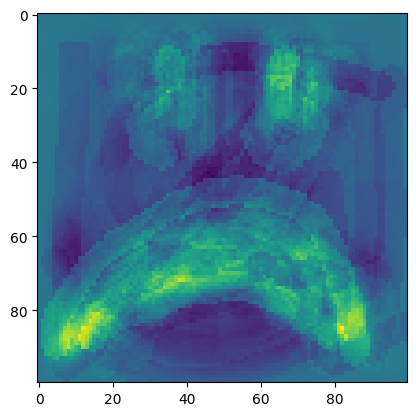

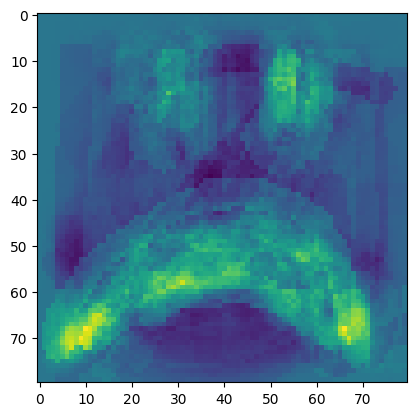

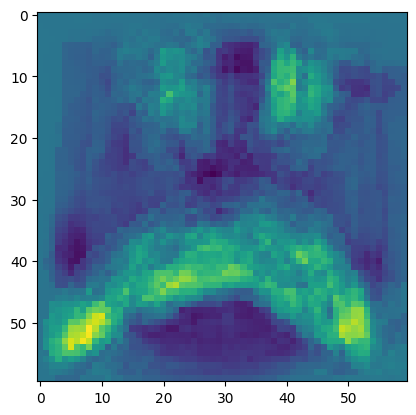

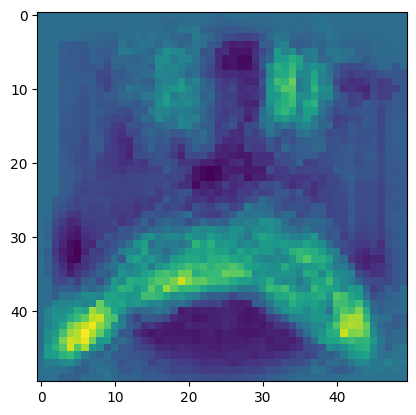

In [ ]:
for i, size in enumerate(sizes):
  weights_visualisation = np.reshape(weights_all_sizes[i][:, 1], (size, size))
  plt.imshow(weights_visualisation)
  plt.show()

In [ ]:
print(bias_all_sizes)

###Test av prediktioner 1

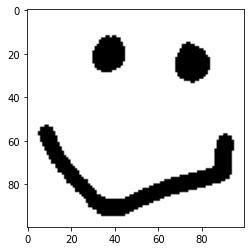


Testbild nr 29 (etikett (1, 0))
Prediktion: 94.52% glad, 1.5% ledsen
------------------------------



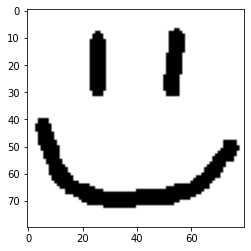


Testbild nr 22 (etikett (1, 0))
Prediktion: 98.01% glad, 2.25% ledsen
------------------------------



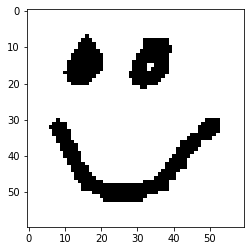


Testbild nr 16 (etikett (1, 0))
Prediktion: 75.95% glad, 1.64% ledsen
------------------------------



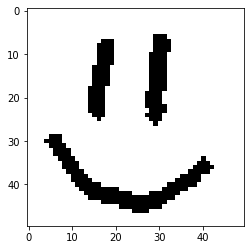


Testbild nr 33 (etikett (1, 0))
Prediktion: 89.99% glad, 1.59% ledsen
------------------------------



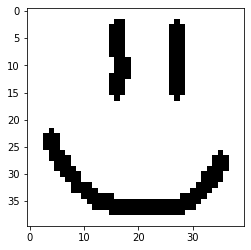


Testbild nr 22 (etikett (1, 0))
Prediktion: 90.42% glad, 6.87% ledsen
------------------------------



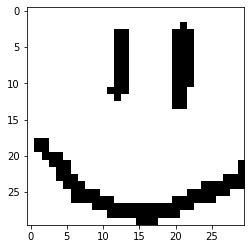


Testbild nr 2 (etikett (1, 0))
Prediktion: 69.08% glad, 14.37% ledsen
------------------------------



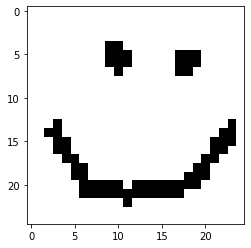


Testbild nr 24 (etikett (1, 0))
Prediktion: 77.27% glad, 12.69% ledsen
------------------------------



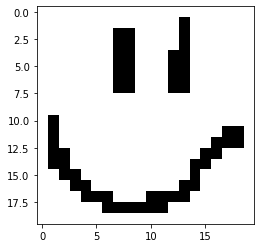


Testbild nr 7 (etikett (1, 0))
Prediktion: 75.79% glad, 14.47% ledsen
------------------------------



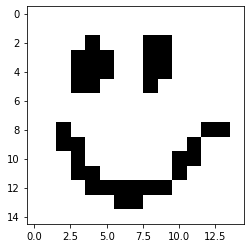


Testbild nr 23 (etikett (1, 0))
Prediktion: 42.54% glad, 13.41% ledsen
------------------------------



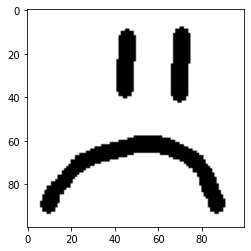


Testbild nr 17 (etikett (0, 1))
Prediktion: 0.38% glad, 96.49% ledsen
------------------------------



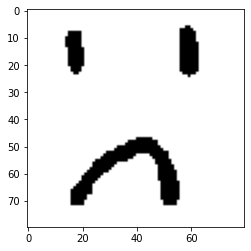


Testbild nr 11 (etikett (0, 1))
Prediktion: 3.14% glad, 57.46% ledsen
------------------------------



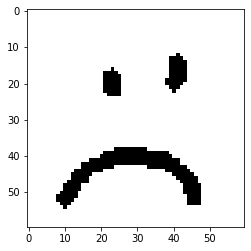


Testbild nr 7 (etikett (0, 1))
Prediktion: 3.72% glad, 87.7% ledsen
------------------------------



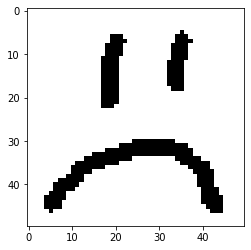


Testbild nr 11 (etikett (0, 1))
Prediktion: 2.61% glad, 96.23% ledsen
------------------------------



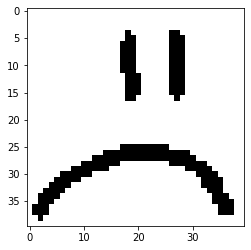


Testbild nr 36 (etikett (0, 1))
Prediktion: 3.03% glad, 93.25% ledsen
------------------------------



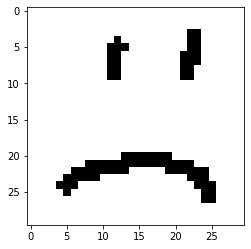


Testbild nr 36 (etikett (0, 1))
Prediktion: 7.36% glad, 86.17% ledsen
------------------------------



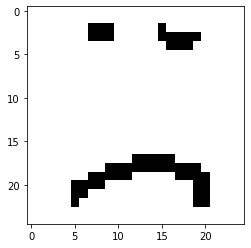


Testbild nr 29 (etikett (0, 1))
Prediktion: 16.56% glad, 54.91% ledsen
------------------------------



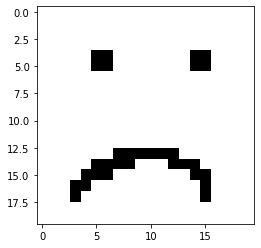


Testbild nr 10 (etikett (0, 1))
Prediktion: 12.64% glad, 68.56% ledsen
------------------------------



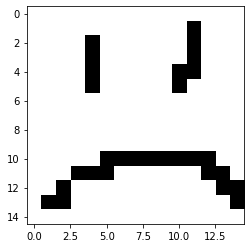


Testbild nr 18 (etikett (0, 1))
Prediktion: 16.2% glad, 66.85% ledsen
------------------------------



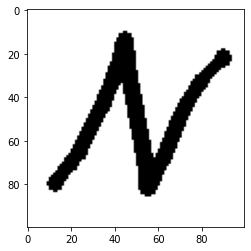


Testbild nr 8 (etikett (0, 0))
Prediktion: 0.04% glad, 2.52% ledsen
------------------------------



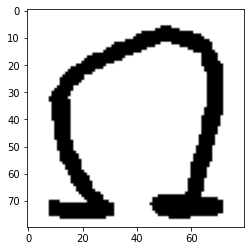


Testbild nr 38 (etikett (0, 0))
Prediktion: 11.63% glad, 1.05% ledsen
------------------------------



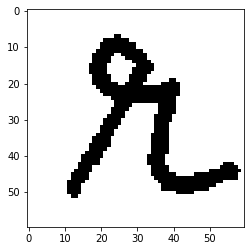


Testbild nr 16 (etikett (0, 0))
Prediktion: 6.91% glad, 11.1% ledsen
------------------------------



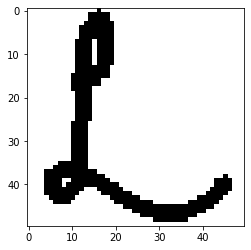


Testbild nr 31 (etikett (0, 0))
Prediktion: 53.95% glad, 13.32% ledsen
------------------------------



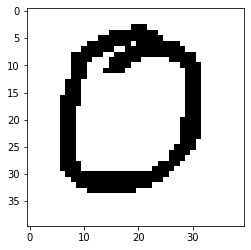


Testbild nr 0 (etikett (0, 0))
Prediktion: 13.45% glad, 5.87% ledsen
------------------------------



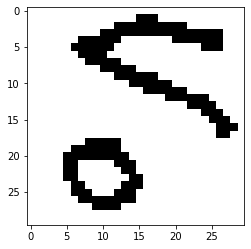


Testbild nr 21 (etikett (0, 0))
Prediktion: 24.53% glad, 8.55% ledsen
------------------------------



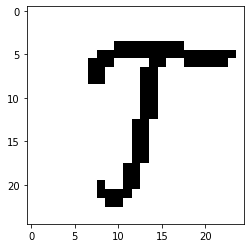


Testbild nr 15 (etikett (0, 0))
Prediktion: 26.65% glad, 12.63% ledsen
------------------------------



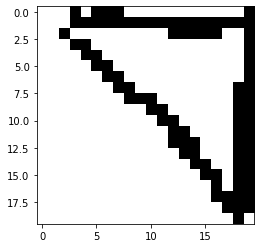


Testbild nr 28 (etikett (0, 0))
Prediktion: 14.93% glad, 27.0% ledsen
------------------------------



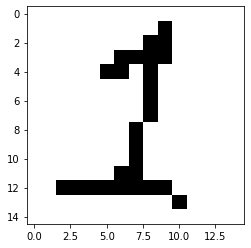


Testbild nr 3 (etikett (0, 0))
Prediktion: 26.04% glad, 21.47% ledsen
------------------------------



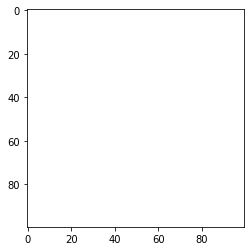


Testbild nr 6 (etikett (0, 0))
Prediktion: 24.91% glad, 25.0% ledsen
------------------------------



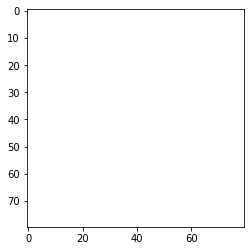


Testbild nr 3 (etikett (0, 0))
Prediktion: 25.11% glad, 24.97% ledsen
------------------------------



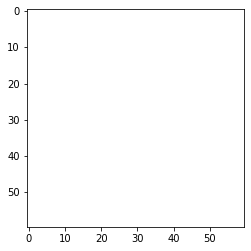


Testbild nr 18 (etikett (0, 0))
Prediktion: 25.08% glad, 24.85% ledsen
------------------------------



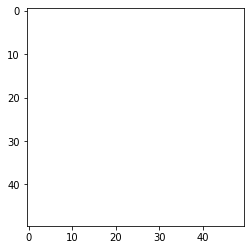


Testbild nr 7 (etikett (0, 0))
Prediktion: 24.99% glad, 25.26% ledsen
------------------------------



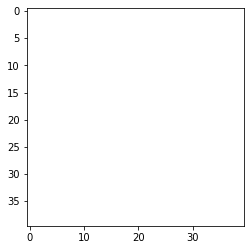


Testbild nr 3 (etikett (0, 0))
Prediktion: 25.07% glad, 25.47% ledsen
------------------------------



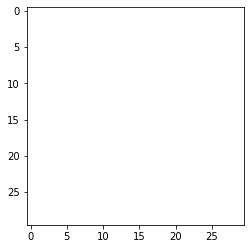


Testbild nr 13 (etikett (0, 0))
Prediktion: 25.44% glad, 25.91% ledsen
------------------------------



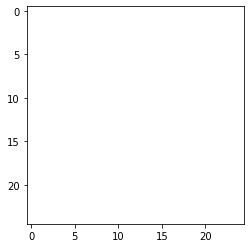


Testbild nr 2 (etikett (0, 0))
Prediktion: 26.03% glad, 26.23% ledsen
------------------------------



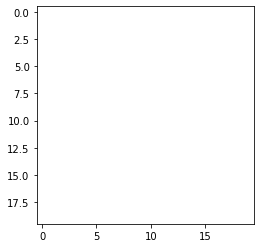


Testbild nr 19 (etikett (0, 0))
Prediktion: 26.48% glad, 27.04% ledsen
------------------------------



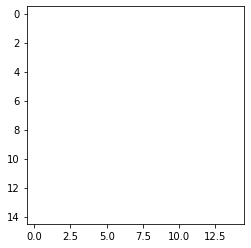


Testbild nr 0 (etikett (0, 0))
Prediktion: 27.43% glad, 28.86% ledsen
------------------------------



In [ ]:
for test_data_all_sizes, label in test_data_all_categories_all_sizes:
  for size_index, test_data in enumerate(test_data_all_sizes):
    random_index = random.randrange(len(test_data))
    test_image = test_data[random_index]

    weights_array = weights_all_sizes[size_index]
    bias_array = bias_all_sizes[size_index]

    plt.imshow(test_image, cmap="gray_r")
    plt.show()

    y_hat = sigma(test_image.flatten() @ weights_array + bias_array)
    print(f"\nTestbild nr {random_index} (etikett {label})")
    print(f"Prediktion: {round(y_hat[0][0]*100, 2)}% glad, {round(y_hat[0][1]*100, 2)}% ledsen")
    print("-"*30 + "\n")

###Test av prediktioner 2

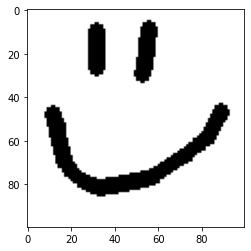


Glad: 72.08% Ledsen: 1.09%
------------------------------



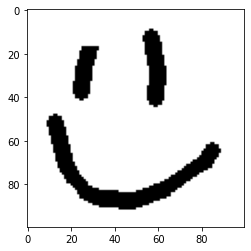


Glad: 96.72% Ledsen: 0.16%
------------------------------



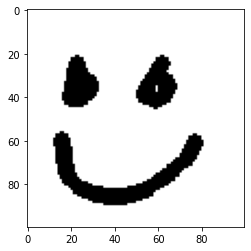


Glad: 93.51% Ledsen: 0.29%
------------------------------



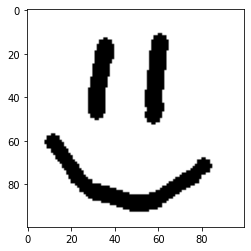


Glad: 92.24% Ledsen: 0.45%
------------------------------



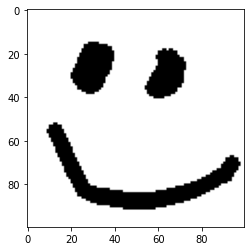


Glad: 98.56% Ledsen: 0.66%
------------------------------



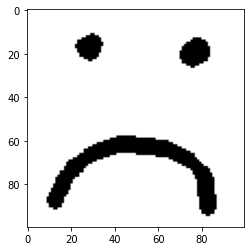


Glad: 0.66% Ledsen: 95.71%
------------------------------



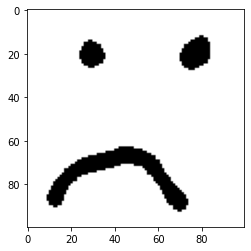


Glad: 2.11% Ledsen: 80.61%
------------------------------



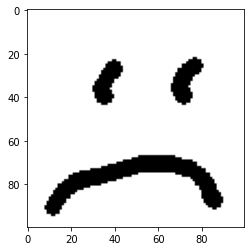


Glad: 1.54% Ledsen: 92.75%
------------------------------



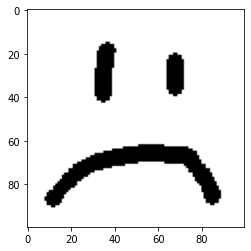


Glad: 1.17% Ledsen: 98.41%
------------------------------



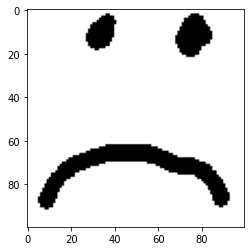


Glad: 0.73% Ledsen: 97.01%
------------------------------



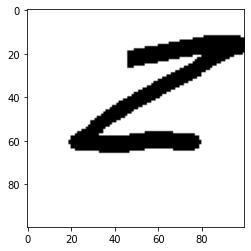


Glad: 0.25% Ledsen: 3.74%
------------------------------



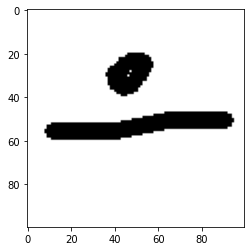


Glad: 0.84% Ledsen: 1.25%
------------------------------



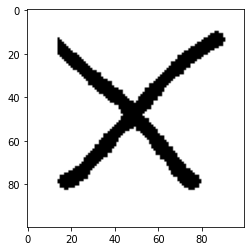


Glad: 0.96% Ledsen: 10.29%
------------------------------



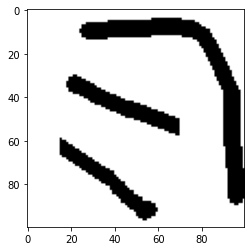


Glad: 2.31% Ledsen: 0.08%
------------------------------



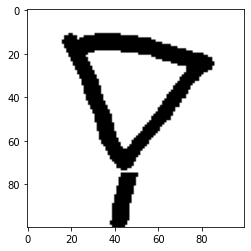


Glad: 2.3% Ledsen: 1.52%
------------------------------



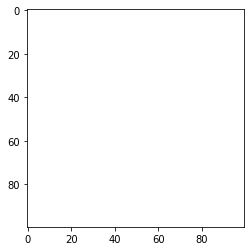


Glad: 24.91% Ledsen: 25.0%
------------------------------



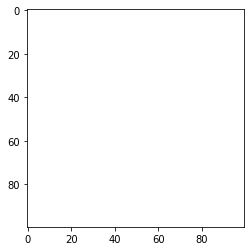


Glad: 24.91% Ledsen: 25.0%
------------------------------



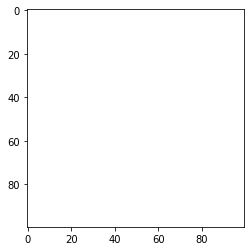


Glad: 24.91% Ledsen: 25.0%
------------------------------



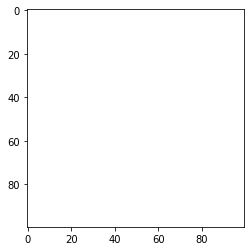


Glad: 24.91% Ledsen: 25.0%
------------------------------



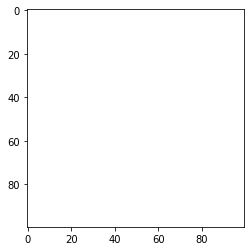


Glad: 24.91% Ledsen: 25.0%
------------------------------



In [ ]:
datasets = [data_happy, data_sad, data_neutral, data_blank]

for dataset in datasets:
  for size_index, size in [(0, 100)]: #enumerate(sizes):
    for _ in range(5):
      index = random.randint(0,100)
      test_image = dataset[size_index][index]

      weights_array = weights_all_sizes[size_index]
      bias_array = bias_all_sizes[size_index]

      plt.imshow(test_image, cmap="gray_r")
      plt.show()

      y_hat = sigma(test_image.flatten() @ weights_array + bias_array)
      print(f"\nGlad: {round(y_hat[0][0]*100, 2)}% Ledsen: {round(y_hat[0][1]*100, 2)}%\n{'-'*30}\n")

###Test av prediktion 3 (classifier-funktion)

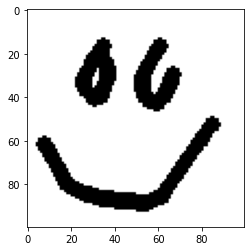


Testbild nr 23 (etikett (1, 0))
Prediktion: 98.87% glad, 0.03% ledsen
------------------------------



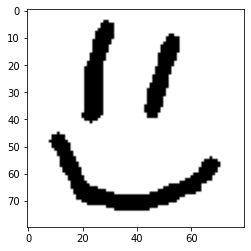


Testbild nr 26 (etikett (1, 0))
Prediktion: 96.58% glad, 0.76% ledsen
------------------------------



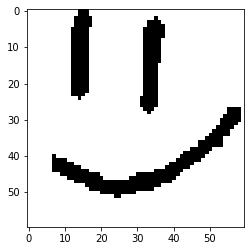


Testbild nr 16 (etikett (1, 0))
Prediktion: 76.81% glad, 0.33% ledsen
------------------------------



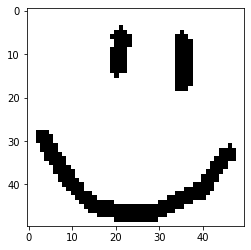


Testbild nr 3 (etikett (1, 0))
Prediktion: 93.81% glad, 2.7% ledsen
------------------------------



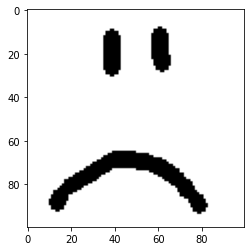


Testbild nr 23 (etikett (0, 1))
Prediktion: 0.55% glad, 97.46% ledsen
------------------------------



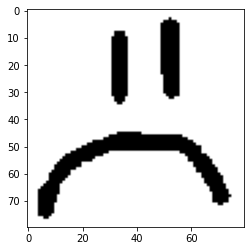


Testbild nr 13 (etikett (0, 1))
Prediktion: 0.87% glad, 97.02% ledsen
------------------------------



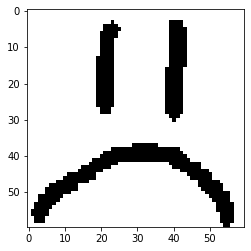


Testbild nr 37 (etikett (0, 1))
Prediktion: 0.85% glad, 98.95% ledsen
------------------------------



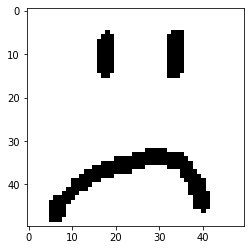


Testbild nr 3 (etikett (0, 1))
Prediktion: 2.51% glad, 97.74% ledsen
------------------------------



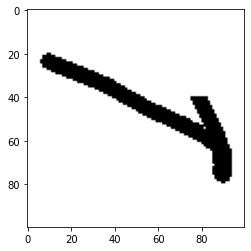


Testbild nr 33 (etikett (0, 0))
Prediktion: 8.66% glad, 0.08% ledsen
------------------------------



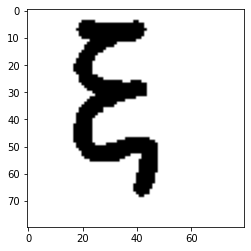


Testbild nr 29 (etikett (0, 0))
Prediktion: 0.08% glad, 2.48% ledsen
------------------------------



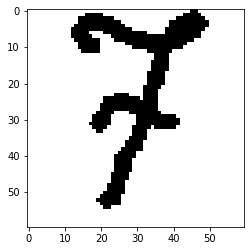


Testbild nr 36 (etikett (0, 0))
Prediktion: 1.78% glad, 0.49% ledsen
------------------------------



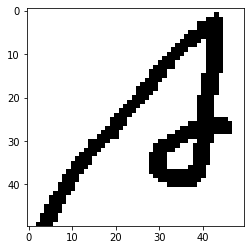


Testbild nr 23 (etikett (0, 0))
Prediktion: 0.33% glad, 30.27% ledsen
------------------------------



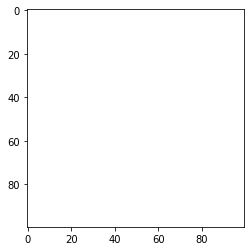


Testbild nr 1 (etikett (0, 0))
Prediktion: 11.79% glad, 11.75% ledsen
------------------------------



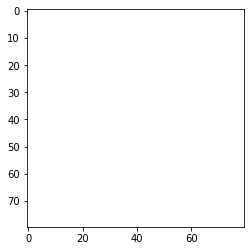


Testbild nr 3 (etikett (0, 0))
Prediktion: 11.96% glad, 11.91% ledsen
------------------------------



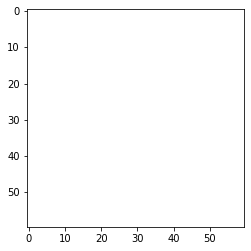


Testbild nr 1 (etikett (0, 0))
Prediktion: 12.32% glad, 12.23% ledsen
------------------------------



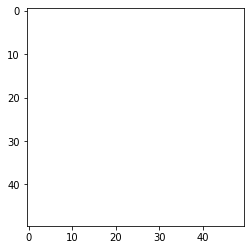


Testbild nr 19 (etikett (0, 0))
Prediktion: 12.6% glad, 12.5% ledsen
------------------------------



In [ ]:
for test_data_all_sizes, label in test_data_all_categories_all_sizes:
  for test_data in test_data_all_sizes:
    random_index = random.randrange(len(test_data))
    test_image = test_data[random_index]

    plt.imshow(test_image, cmap="gray_r")
    plt.show()

    prediction = classifier(test_image)
    print(f"\nTestbild nr {random_index} (etikett {label})")
    print(f"Prediktion: {round(prediction[0]*100, 2)}% glad, {round(prediction[1]*100, 2)}% ledsen")
    print("-"*30 + "\n")

###Hastighetstest av prediktioner

In [ ]:
number_of_predictions = 10**4

for size_index, size in enumerate(sizes):

  predictions = []
  time_start = time.time_ns()
  counter = 0
  
  while True:
    for test_data_all_sizes, label in test_data_all_categories_all_sizes:
      test_data = test_data_all_sizes[size_index]
      weights_array = weights_all_sizes[size_index]
      bias_array = bias_all_sizes[size_index]
      
      for test_image in test_data:
        y_hat = sigma(test_image.flatten() @ weights_array + bias_array)
        predictions.append(y_hat)
        counter += 1

        if counter >= number_of_predictions:
          break

      if counter >= number_of_predictions:
        break

    if counter >= number_of_predictions:
      break

  time_stop = time.time_ns()
  delta_time = time_stop - time_start

  print(f"Gjorde {counter} prediktioner för storlek {size} på {round(delta_time//10**6, 3)} millisekunder")

Gjorde 10000 prediktioner för storlek 100 på 445 millisekunder
Gjorde 10000 prediktioner för storlek 80 på 336 millisekunder
Gjorde 10000 prediktioner för storlek 60 på 198 millisekunder
Gjorde 10000 prediktioner för storlek 50 på 125 millisekunder


#Klassificerare

In [ ]:
def classifier(array):
  """
  Klassificeraren anropas av faltningen för varje sub-array, och ger en prediktion tillbaka.
  
  ARGUMENT
  array: Kvadratisk array med bilden som ska utvärderas
  
  RETURNERAR
  prediction: En numpy-array med prediktioner för glad och ledsen (flyttal mellan 0-1)
  """
  size = np.shape(array)[0]
  size_index = sizes.index(size)

  X = array.reshape((1, size**2))
  W = weights_all_sizes[size_index]
  B = bias_all_sizes[size_index]

  prediction = sigma(X @ W + B)[0] #Indexerar med 0 för att numpy-matrisen tekniskt sett är i 2D: [[0.5, 0.5]]
  return prediction

#Faltning

In [ ]:
def faltning(picture_matrix, jump_length=1):
  list_function_output =[]
  lista_of_matriser = []

  for size in sizes:
    

    funk_size = int(np.ceil((picture_matrix.shape[0]-size+1)/jump_length))

    funktion_matris_happy = np.zeros((funk_size, funk_size))
    funktion_matris_sad = np.zeros((funk_size, funk_size))
    for y, linje in enumerate(range(int((picture_matrix.shape[0]-size+jump_length)/jump_length))):
      for x, kolumn in enumerate(range(int((picture_matrix.shape[0]-size+jump_length)/jump_length))):
        list_function_output.append(picture_matrix[linje*jump_length:(linje*jump_length+size), kolumn*jump_length:(kolumn*jump_length+size)])  #Detta tar ut faltningen
        
        output = classifier(list_function_output[-1])

        funktion_matris_happy[y, x] = output[0]
        funktion_matris_sad[y, x] = output[1]
       
    
    lista_of_matriser.append((funktion_matris_happy, funktion_matris_sad, size, jump_length))

 
  return lista_of_matriser  


#Tolkning och ritande

###Funktion för tolkning av faltningsutdata

In [ ]:
"""
input_list är den lista som kommer från faltningen. Den innehåller tuples där varje tuple innehåller två matriser och två skalärer.
Den första matrisen är faltningsresultatet för en glad smiley och den andra matrisen för en ledsen smiley. Den första skalären är storleken på faltningskärnan och den andra skalären är hur stora steg kärnan har tagit.
min_value är det lägsta värdet som krävs för att en topp ska räknas som tillräckligt hög för att vara en smiley.
Funktionen returnerar två variabler. Den första är en lista med alla toppar som är uppdelad i två listor, den första är glada toppar, den andra är ledsna toppar. Den andra variabeln som returneras är en lista med alla toppar som har tagits bort för att de överlappade med en annan topp.
"""
def interpreter(input_list, min_value, remove=True, strict_remove=False):
  tops = []
  double_tops = []

  pos_tops = []
  neg_tops = []

  for submatrix in input_list:
    func_surf_pos = np.where(submatrix[0] >= min_value, submatrix[0], 0)
    func_surf_neg = np.where(submatrix[1] >= min_value, submatrix[1], 0)
    func_surfs = [func_surf_pos, func_surf_neg]
    size = submatrix[2]
    jump_size = submatrix[3]

    for i, func_surf in enumerate(func_surfs):
      for x in range((len(func_surfs[0]))):
        for y in range(len(func_surfs[0][0])):              
          r = 0

          if x == 0:
            r += 1
          else:
            neighbour = (x - 1, y)
            if func_surf[neighbour] < func_surf[x, y]:
              r += 1


          if x == (len(func_surf)-1):
            r += 1
          else:
            neighbour = (x + 1, y)
            if func_surf[neighbour] <= func_surf[x, y]:
              r += 1


          if y == 0:
            r += 1
          else:
            neighbour = (x, y - 1)
            if func_surf[neighbour] < func_surf[x, y]:
              r += 1


          if y == (len(func_surf)-1):
            r += 1
          else:
            neighbour = (x, y + 1)
            if func_surf[neighbour] <= func_surf[x, y]:
              r += 1

          #print(r, x, y)
          
          if r == 4 and func_surf[x, y] != 0 and i == 0:
            pos_tops.append((func_surf[x, y], 1, ((x * jump_size, y * jump_size), ((x * jump_size + size - 1), (y * jump_size + size - 1)))))
          elif r == 4 and func_surf[x, y] != 0 and i == 1:
            neg_tops.append((func_surf[x, y], 0, ((x * jump_size, y * jump_size), ((x * jump_size + size - 1), (y * jump_size + size - 1)))))

  all_tops = [pos_tops, neg_tops]


  if strict_remove == True:
    all_tops_in_one = pos_tops + neg_tops
    best_top = all_tops_in_one[np.argmax([top[0] for top in all_tops_in_one])]
    label = best_top[1]
    pos = [] + [best_top]*label
    neg = [] + [best_top]*(1-label)

    return [pos, neg], []

  elif remove == True:
    new_tops = [all_tops[0].copy(), all_tops[1].copy()]

    for i, tops in enumerate(all_tops):
      for j, top1 in enumerate(tops):
        for top2 in tops[j + 1:]:
          if top1[2][0][0] <= top2[2][0][0] and top1[2][1][0] >= top2[2][1][0] and top1[2][0][1] <= top2[2][0][1] and top1[2][1][1] >= top2[2][1][1]:
            if top1[0] > top2[0]:
              if top2 in new_tops[i]:
                new_tops[i].remove(top2)
                double_tops.append(top2)
            else:
              if top1 in new_tops[i]:
                new_tops[i].remove(top1) #Detta är ändrat!!! Måste lösas!!!
                double_tops.append(top1)
              break

    return new_tops, double_tops
  else:
    return all_tops, double_tops

###Funktion för att rita upp originalbilden med inringade smileys

In [ ]:
"""
big_picture är alltså originalbilden med smiley och bakgrundsbös.
all_tops är den första outputvariabeln man får ut från funktionen interpreter().
Funktionen returnerar ingenting, den ritar bara upp originalbilden med inringade smileys (förhoppningsvis).
"""
def paint(big_picture, all_tops):

  overlay_happy = np.zeros((len(big_picture), len(big_picture[0])))
  overlay_sad = np.zeros((len(big_picture), len(big_picture[0])))

  cmap_lime = matplotlib.colors.ListedColormap(['none', 'lime'])
  cmap_red = matplotlib.colors.ListedColormap(['none', 'red'])

  for i, tops in enumerate(all_tops):
    for top in tops:
      up = top[2][0][0]
      down = top[2][1][0]
      left = top[2][0][1]
      right = top[2][1][1]
      if i == 0:
        overlay_happy[up, left:right] = 1
        overlay_happy[down, left+1:right+1] = 1
        overlay_happy[up+1:down+1, left] = 1
        overlay_happy[up:down, right] = 1
      else:
        overlay_sad[up, left:right] = 1
        overlay_sad[down, left+1:right+1] = 1
        overlay_sad[up+1:down+1, left] = 1
        overlay_sad[up:down, right] = 1

  plt.figure(dpi=200)
  plt.imshow(big_picture, cmap = 'gray_r')
  plt.imshow(overlay_sad, cmap = cmap_red)
  plt.imshow(overlay_happy, cmap = cmap_lime)

#Själva körningen

##Big picture

###Specialgrej (kör inte)

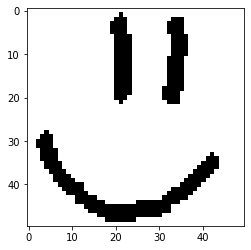

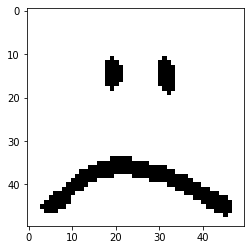

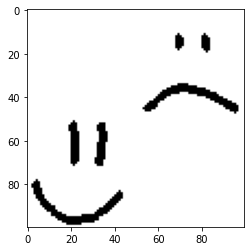

In [ ]:
test_img = np.zeros((100, 100))
happy_img = test_data_all_categories_all_sizes[0][0][3][11] # kategori label storlek nummer
sad_img = test_data_all_categories_all_sizes[1][0][3][11]

test_img[50:, :50] = happy_img
test_img[:50, 50:] = sad_img

plt.imshow(happy_img, cmap="gray_r")
plt.show()
plt.imshow(sad_img, cmap="gray_r")
plt.show()
plt.imshow(test_img, cmap="gray_r")
plt.show()

NameError: ignored

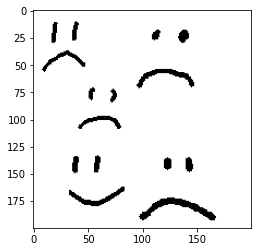

In [ ]:
big_picture = picture_generation()
#big_picture = image

'''
plt.imshow(big_picture, cmap="gray_r")
plt.show()
'''

array_list = faltning(big_picture)

"""
Så här bör slutet på programmet se ut. min_value kan ha definierats tidigare. Vet inte om det behövs i tidigare delar.
"""
min_value = 0.9

#print(array_list[5])

all_tops, double_tops = interpreter(array_list, min_value)

#print(all_tops)

paint(big_picture, all_tops)
print(f"Det togs bort {len(double_tops)} topp(ar) för att de(n) antagligen gav utslag för en redan hittad smiley.")

##Test

###Visualisering av toppar

151
[[0.0199956  0.020682   0.0259258  ... 0.20533016 0.21188199 0.22067475]
 [0.02130297 0.0220886  0.02823023 ... 0.20920279 0.21332421 0.2205719 ]
 [0.02233357 0.02312095 0.0296958  ... 0.21854687 0.2189331  0.22314272]
 ...
 [0.2517552  0.25159367 0.25147071 ... 0.12302207 0.14550334 0.17703793]
 [0.25193325 0.25193325 0.25193325 ... 0.11646618 0.13263818 0.1603908 ]
 [0.25193325 0.25193325 0.25193325 ... 0.1159216  0.1274706  0.14869269]]


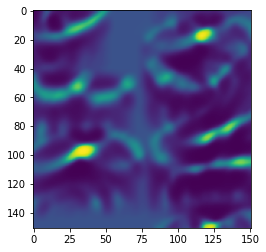

In [ ]:
a = array_list[3][1]
print(len(a))
print(a)
plt.imshow(a)

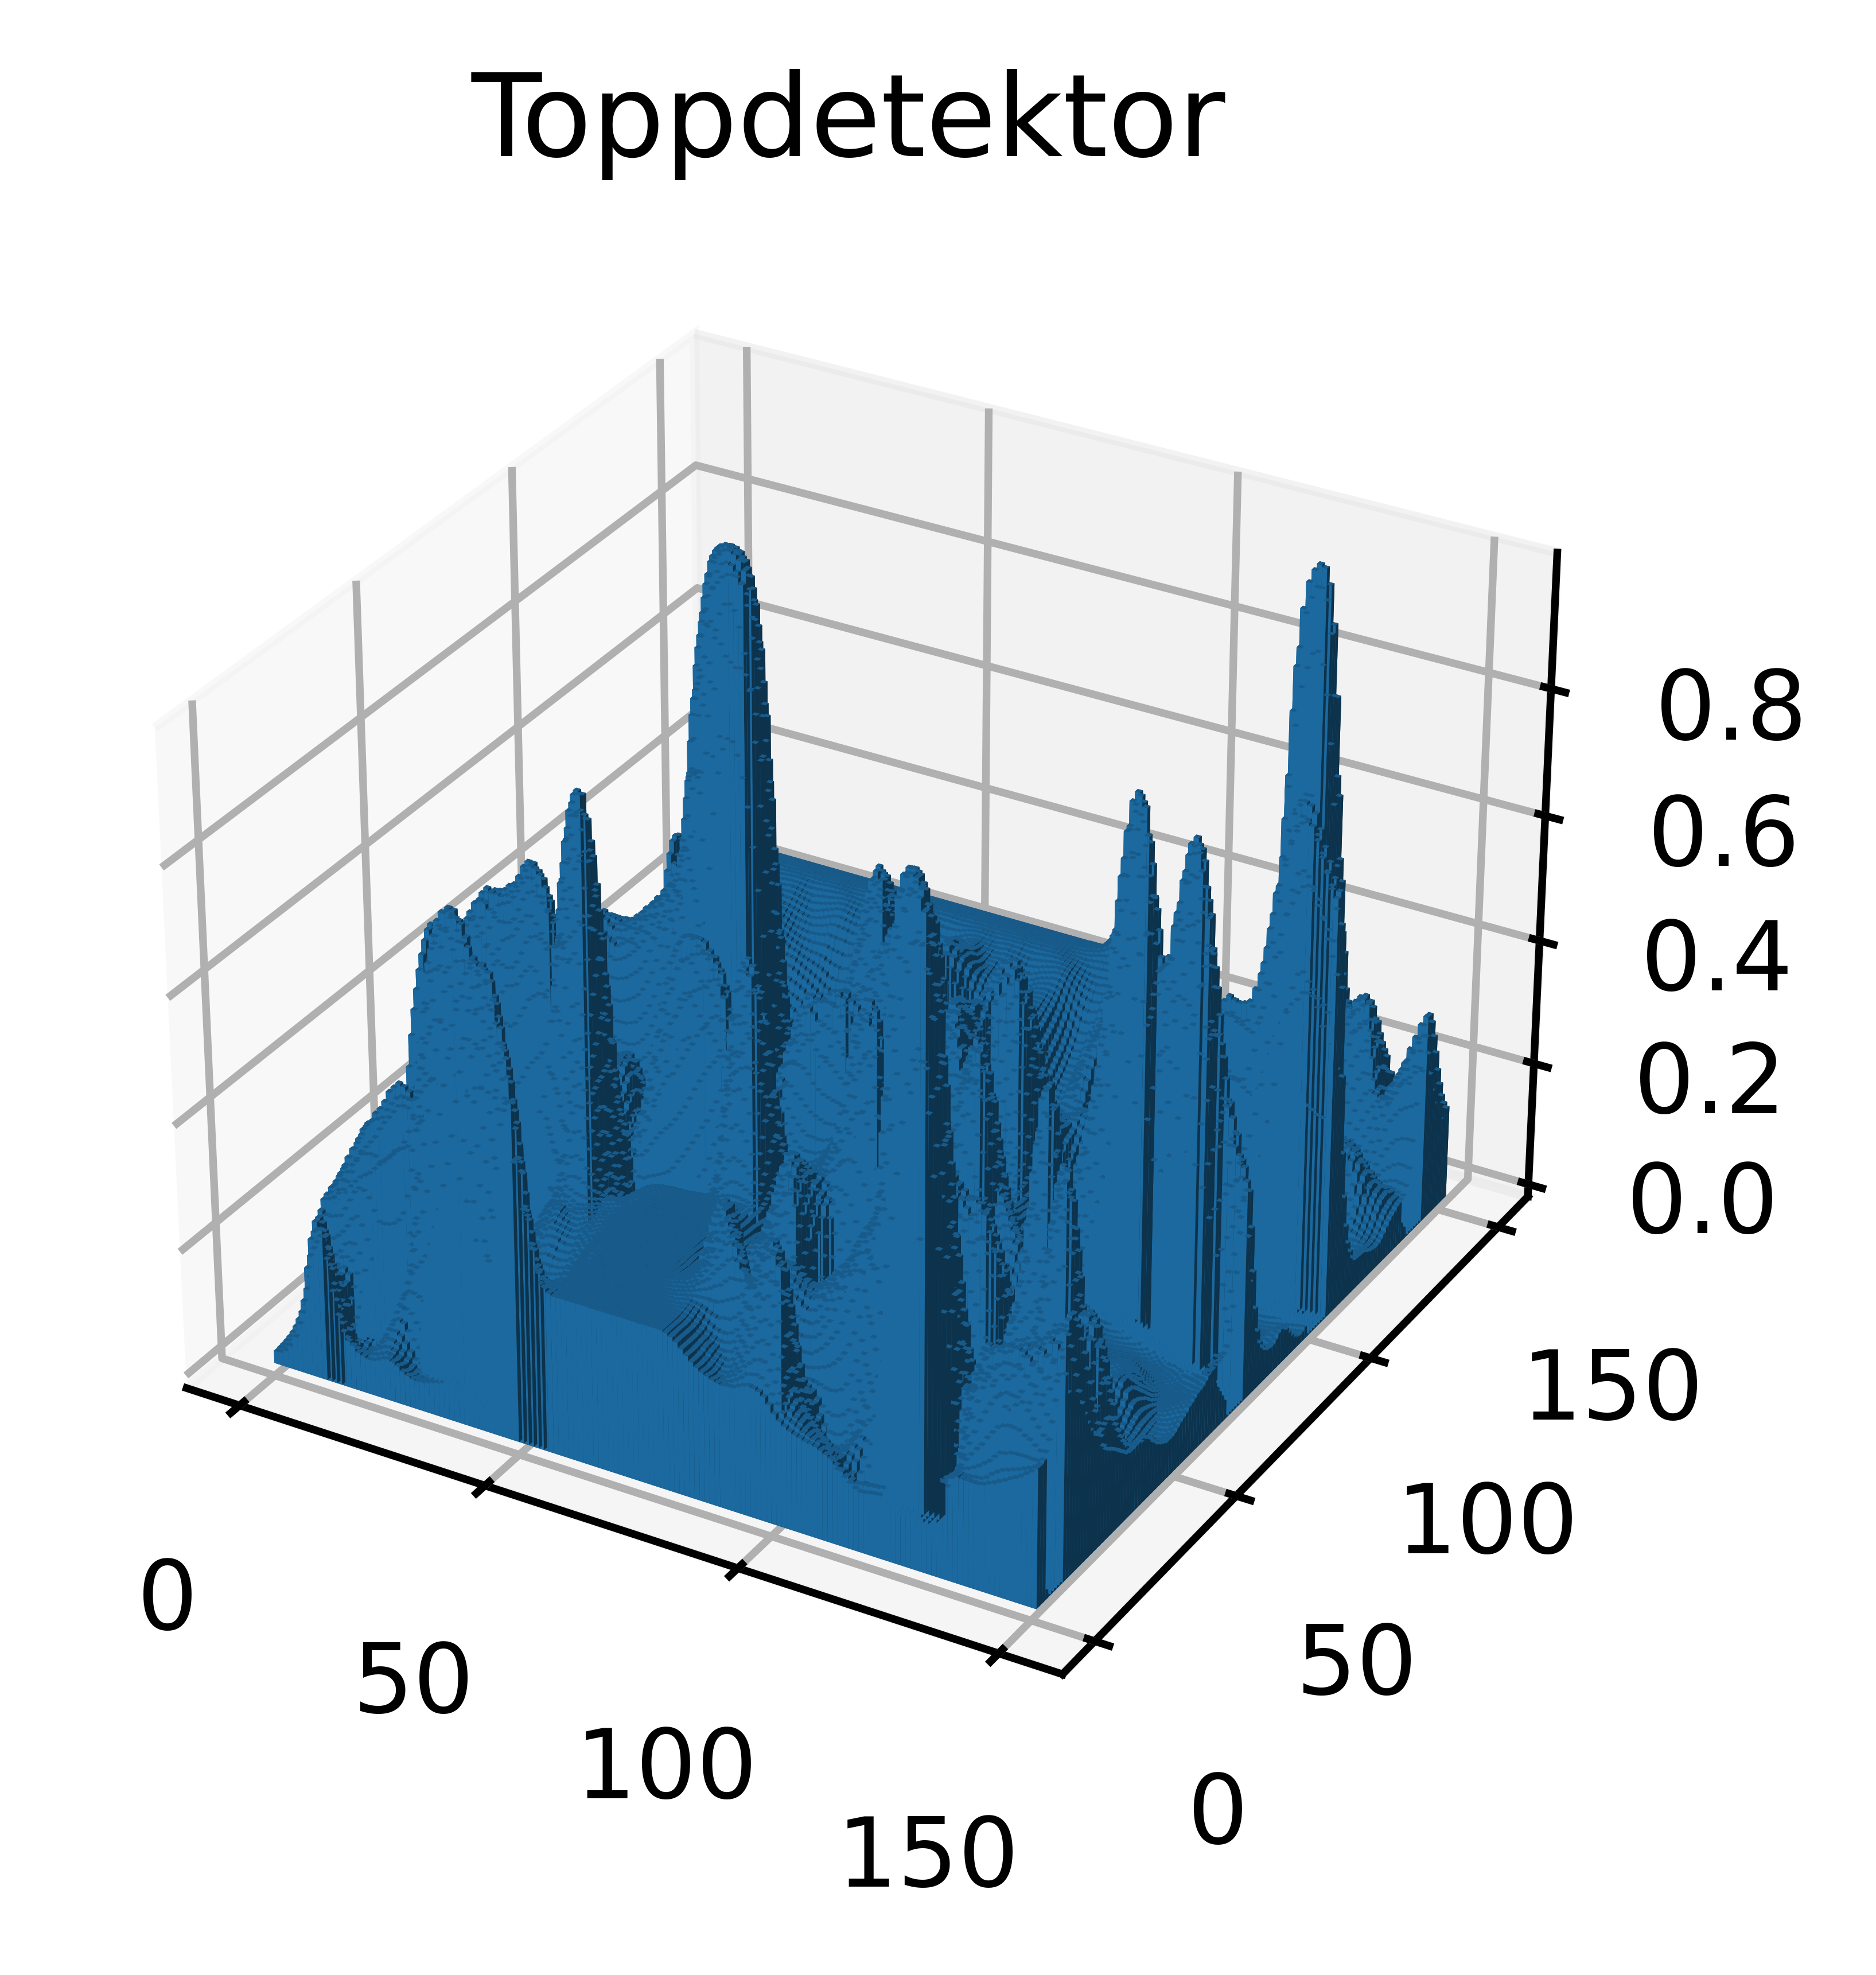

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# set up the figure and axes
fig = plt.figure(figsize=(8, 3), dpi=1200)
#plt.figure(dpi=1000)
ax1 = fig.add_subplot(121, projection='3d')
#ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = np.arange(151)
_y = np.arange(151)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x
top = np.array([6, 7, 6, 4, 2, 3, 4,
                7, 9, 6, 2, 1, 2, 2,
                2, 7, 5, 3, 2, 3, 2,
                3, 6, 5, 4, 3, 4, 3,
                5, 5, 4, 5, 7, 5, 4,
                4, 4, 5, 7, 9, 8, 7,
                6, 5, 4, 5, 6, 8, 7,])
top = a.flatten()
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Toppdetektor')

#ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
#ax2.set_title('Not Shaded')

plt.show()

##Resultat

###Skapa evaluation_list

In [ ]:
canvas_size = 200
evaluation_list = []

for test_data_all_sizes, label in test_data_all_categories_all_sizes[0:2]:
  for size_index, test_data in enumerate(test_data_all_sizes[:len(sizes)]):
    size = sizes[size_index]
    for image in test_data:
      x = random.randrange(0, canvas_size - size)
      y = random.randrange(0, canvas_size - size)
      top_left = (x,y)

      canvas = np.zeros((canvas_size, canvas_size))
      canvas[y:y+size, x:x+size] = image
      evaluation_list.append([canvas, label, top_left, size])

print(len(evaluation_list), "testbilder")

320 testbilder


In [ ]:
for test_data_all_sizes, label in test_data_all_categories_all_sizes[0:2]:
  for size_index, test_data in enumerate(test_data_all_sizes[2:len(sizes)]):
    size = sizes[2]
    for image in test_data[5:]:
      x = random.randrange(0, canvas_size - size)
      y = random.randrange(0, canvas_size - size)
      top_left = (x,y)

      canvas = np.zeros((canvas_size, canvas_size))
      canvas[y:y+size, x:x+size] = image
      evaluation_list.append([canvas, label, top_left, size])

      break
    break
  break

plt.figure(dpi=200)
plt.imshow(canvas, cmap="gray_r")
plt.show()

###Visa bild ur evaluation_list

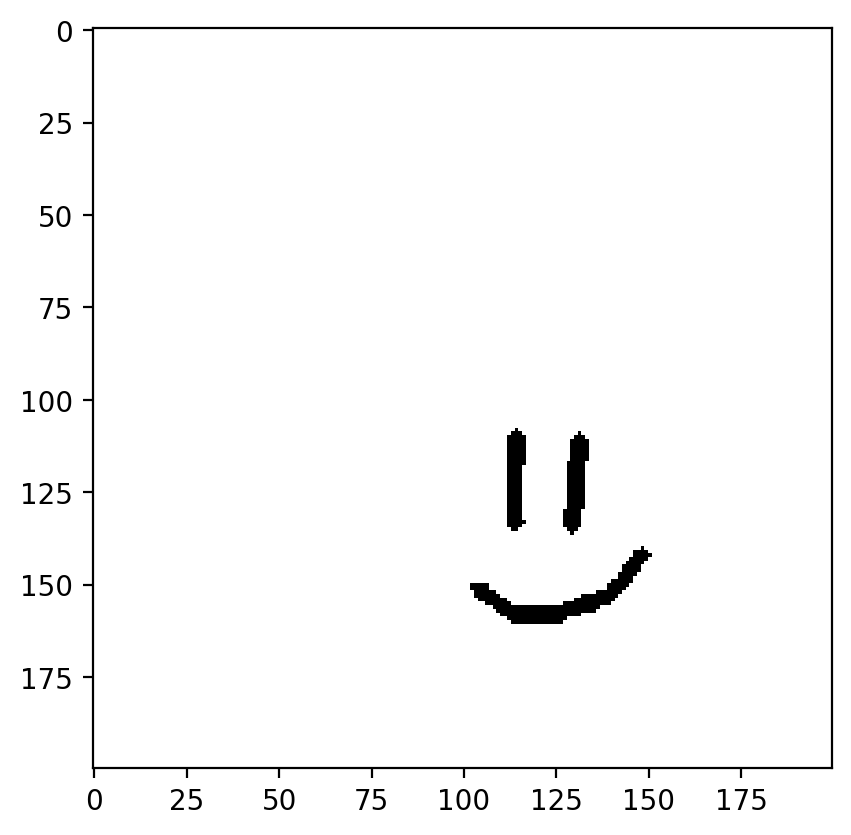

(1, 0) (98, 105) 60


In [ ]:
evaluation_list[random.randrange(len(evaluation_list))]
image, label, top_left, size = example
plt.figure(dpi=200)
plt.imshow(image, cmap="gray_r")
plt.show()
print(label, top_left, size)

###Utvärderingsfunktion

In [ ]:
def evaluation(image, label, top_left, size, output=False, step_size=1, min_value=0.9):
  answer_map_happy = np.zeros((canvas_size, canvas_size))
  answer_map_sad = np.zeros((canvas_size, canvas_size))

  if label == (1,0):
    answer_map_happy[top_left[1]:top_left[1]+size, top_left[0]:top_left[0]+size] = 1
  elif label == (0,1):
    answer_map_sad[top_left[1]:top_left[1]+size, top_left[0]:top_left[0]+size] = 1
  else:
    print("Ojdå det här var inte bra")
    print(1/0)

  array_list = faltning(image, step_size)

  all_tops, double_tops = interpreter(array_list, min_value, remove=False)
  tops_happy, tops_sad = all_tops

  guess_list = []
  for top in tops_happy + tops_sad:
    confidence, label, coordinates = top
    top_left, bottom_right = coordinates

    guess_map = np.zeros((canvas_size, canvas_size))
    guess_map[top_left[0]:bottom_right[0]-1, top_left[1]:bottom_right[1]-1] = 1
    
    if label == 0:
      overlap = np.logical_and(answer_map_sad, guess_map)
    if label == 1:
      overlap = np.logical_and(answer_map_happy, guess_map)
    
    precision = np.sum(overlap) / np.sum(guess_map)
    recall = np.sum(overlap) / (np.sum(answer_map_happy) + np.sum(answer_map_sad)) # Endast en av answer_map_happy och sad är >0

    guess = (top, precision, recall)
    guess_list.append(guess)

  if output:
    paint(image, all_tops)
    plt.show()

    print("\nGissningar:\n" + "\n".join([f"{percentage(top[0])} confidence för {'positiv'*top[1]+'negativ'*(1-top[1])} @ {(str(top[2])+',').ljust(25)} storlek {str(top[2][1][0] - top[2][0][0] + 1).rjust(3)}, precision: {percentage(precision)}, recall: {percentage(recall)}" for top, precision, recall in guess_list]))

    '''
    visualisation_happy = guess_map_happy + 2*answer_map_happy # + 3*overlap_happy
    visualisation_sad = guess_map_sad + 2*answer_map_sad # + 3*overlap_happy

    visualisation_cmap = matplotlib.colors.ListedColormap(['white', 'red', 'blue', 'magenta'])
    plt.figure(dpi=200) # Använd den här för att få high res
    plt.imshow(visualisation_happy, cmap = visualisation_cmap)
    plt.show()
    plt.figure(dpi=200)
    plt.imshow(visualisation_sad, cmap = visualisation_cmap)
    plt.show()
    '''

  #return total_error

  if len(guess_list) == 0:
    return (0.0, 0.0), (0.0, 0.0), (0.0, 0.0)


  PnR_avg = (np.average([precision for top, precision, recall in guess_list]), np.average([recall for top, precision, recall in guess_list]))
  PnR_pred = guess_list[np.argmax([top[0] for top, precision, recall in guess_list])][1:]
  PnR_best = guess_list[np.argmax([hmean(precision, recall) for top, precision, recall in guess_list])][1:]

  return PnR_avg, PnR_pred, PnR_best

###Utvärdera specifik bild

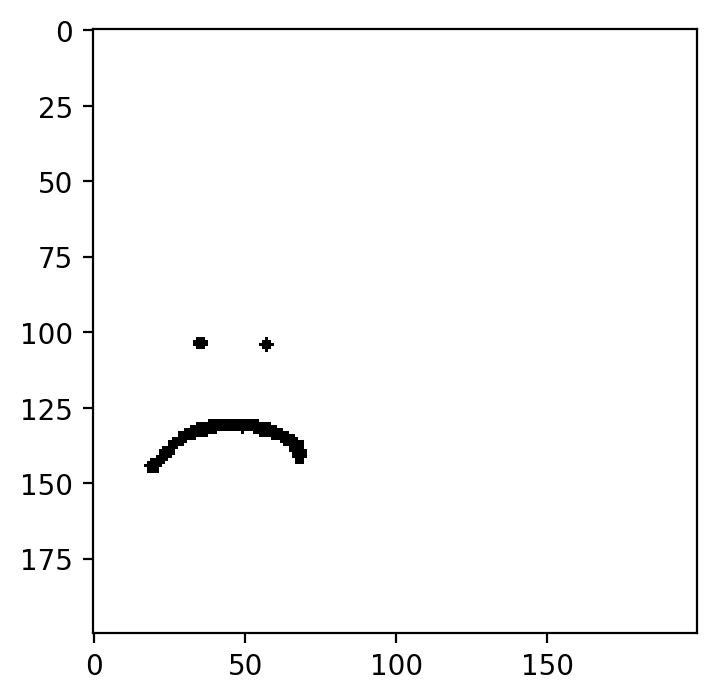


Gissningar:


Resultat:
Medelvärde               precision: 0.000%, recall: 0.000%
Säkraste prediktion      precision: 0.000%, recall: 0.000%
Bästa PnR                precision: 0.000%, recall: 0.000%


In [ ]:
step_size = 10

example = evaluation_list[255]
image, label, top_left, size = example
#image = picture_generation()

PnR_avg, PnR_pred, PnR_best = evaluation(image, label, top_left, size, True, step_size)
#total_error = evaluation(image, label, top_left, size, True, step_size)

print("\nResultat:")
print("Medelvärde".ljust(25)          + f"precision: {percentage(PnR_avg[0]) }, recall: {percentage(PnR_avg[1]) }")
print("Säkraste prediktion".ljust(25) + f"precision: {percentage(PnR_pred[0])}, recall: {percentage(PnR_pred[1])}")
print("Bästa PnR".ljust(25)           + f"precision: {percentage(PnR_best[0])}, recall: {percentage(PnR_best[1])}")

###Datainsamling

In [ ]:
step_size = 1
data_count = len(evaluation_list) # Alla

results = []
prev = 0 # För progress bar
print(f"Kör utvärdering på {data_count} bilder...\n")
print("0%                        100%")
print("|                            |")

time_start = int(time.time())

for i, sample in enumerate(evaluation_list[:data_count]):
  image, label, top_left, size = sample

  total_error = evaluation(image, label, top_left, size, False, step_size)
  results.append(total_error)

  v = np.floor(30*(i+1) / data_count)
  if v > prev:
    print("-", end="")
  prev = v

time_stop = int(time.time())
delta_time = time_stop - time_start

average_time = delta_time / data_count

timestamp = list(time.localtime()[:])
timestamp[3] += 1
timestamp = "-".join(map(str, timestamp[:3])) + " " + ":".join([str(x).zfill(2) for x in timestamp[3:6]])

description = {
    "timestamp": timestamp,
    "step_size": step_size,
    "runtime": delta_time,
    "data_count": data_count,
    "average_time": average_time
}

print("\n\nResultat färdigt för stegstorlek " + str(step_size) + ", Körtid " + str(delta_time) + ", version " + timestamp)
print(description)

Kör utvärdering på 320 bilder...

0%                        100%
|                            |
------------------------------

Resultat färdigt för stegstorlek 1, Körtid 717, version 2023-3-26 12:47:29
{'timestamp': '2023-3-26 12:47:29', 'step_size': 1, 'runtime': 717, 'data_count': 320, 'average_time': 2.240625}


###Spara resultatet

In [ ]:
print(description)

{'timestamp': '2023-3-26 12:47:29', 'step_size': 1, 'runtime': 717, 'data_count': 320, 'average_time': 2.240625}


In [ ]:
print(results)

[((0.7259264835465574, 0.36190000000000005), (0.9655172413793104, 0.3248), (1.0, 0.9604)), ((0.9523809523809524, 0.5716666666666667), (1.0, 0.3364), (0.8877551020408163, 0.8526)), ((0.8579441967335303, 0.46884999999999993), (0.9583333333333334, 0.2208), (1.0, 0.9604)), ((0.6257351561391544, 0.21317142857142857), (1.0, 0.2304), (0.9897959183673469, 0.9506)), ((0.467017419212583, 0.17640588235294116), (1.0, 0.6084), (0.9392961266139108, 0.9021)), ((0.6399416909620992, 0.2666), (1.0, 0.6084), (0.9591836734693877, 0.9212)), ((0.4852153245739252, 0.20188), (0.9591836734693877, 0.9212), (0.9591836734693877, 0.9212)), ((0.9880976757640466, 0.39020869565217386), (0.9871794871794872, 0.6006), (1.0, 0.9604)), ((0.5886953667099152, 0.20145714285714286), (0.896551724137931, 0.3016), (0.8887963348604748, 0.8536)), ((0.5638954783333032, 0.22730434782608694), (1.0, 0.6084), (1.0, 0.9604)), ((0.9382784137053191, 0.401552380952381), (0.949396084964598, 0.9118), (0.9596001665972511, 0.9216)), ((0.594450

In [ ]:
os.chdir('/content/drive/My Drive/GA/Data')
f = open("results.txt", "a")
f.write(str(description) + " $ " + str(results) + "\n")
f.close()

### Ladda in alla resultat

In [ ]:
os.chdir('/content/drive/My Drive/GA/Data')
f = open("results.txt")
all_results = [row.split("$") for row in f.readlines()]
f.close()
all_results = [[eval(row[0]), eval(row[1])] for row in all_results]

In [ ]:
# Test
for trial in all_results:
  description, result = trial
  timestamp, step_size, runtime, data_count, average_time = description.values()
  print(str(description).ljust(120), result)

{'timestamp': '2023-3-26 12:47:29', 'step_size': 1, 'runtime': 717, 'data_count': 320, 'average_time': 2.240625}         [((0.7259264835465574, 0.36190000000000005), (0.9655172413793104, 0.3248), (1.0, 0.9604)), ((0.9523809523809524, 0.5716666666666667), (1.0, 0.3364), (0.8877551020408163, 0.8526)), ((0.8579441967335303, 0.46884999999999993), (0.9583333333333334, 0.2208), (1.0, 0.9604)), ((0.6257351561391544, 0.21317142857142857), (1.0, 0.2304), (0.9897959183673469, 0.9506)), ((0.467017419212583, 0.17640588235294116), (1.0, 0.6084), (0.9392961266139108, 0.9021)), ((0.6399416909620992, 0.2666), (1.0, 0.6084), (0.9591836734693877, 0.9212)), ((0.4852153245739252, 0.20188), (0.9591836734693877, 0.9212), (0.9591836734693877, 0.9212)), ((0.9880976757640466, 0.39020869565217386), (0.9871794871794872, 0.6006), (1.0, 0.9604)), ((0.5886953667099152, 0.20145714285714286), (0.896551724137931, 0.3016), (0.8887963348604748, 0.8536)), ((0.5638954783333032, 0.22730434782608694), (1.0, 0.6084), (1.0, 0

###Multipelkörning

In [ ]:
step_size_list = list(range(2,10)) + list(range(10, 50, 5)) + list(range(50, 101, 10))
data_count = len(evaluation_list) # Alla

for step_size in step_size_list:
  results = []
  prev = 0 # För progress bar
  print(f"Kör utvärdering med steglängd {step_size} på {data_count} bilder...\n")
  print("0%                        100%")
  print("|                            |")

  time_start = int(time.time())

  for i, sample in enumerate(evaluation_list[:data_count]):
    image, label, top_left, size = sample

    total_error = evaluation(image, label, top_left, size, False, step_size)
    results.append(total_error)

    v = np.floor(30*(i+1) / data_count)
    if v > prev:
      print("-", end="")
    prev = v

  time_stop = int(time.time())
  delta_time = time_stop - time_start

  average_time = delta_time / data_count

  timestamp = list(time.localtime()[:])
  timestamp[3] += 1
  timestamp = "-".join(map(str, timestamp[:3])) + " " + ":".join([str(x).zfill(2) for x in timestamp[3:6]])

  description = {
      "timestamp": timestamp,
      "step_size": step_size,
      "runtime": delta_time,
      "data_count": data_count,
      "average_time": average_time
  }

  print("\n\nResultat färdigt för stegstorlek " + str(step_size) + ", Körtid " + str(delta_time) + ", version " + timestamp)
  print(description)
  print()

  os.chdir('/content/drive/My Drive/GA/Data')
  f = open("results.txt", "a")
  f.write(str(description) + " $ " + str(results) + "\n")
  f.close()

Kör utvärdering med steglängd 2 på 320 bilder...

0%                        100%
|                            |
------------------------------

Resultat färdigt för stegstorlek 2, Körtid 192, version 2023-3-26 12:58:44
{'timestamp': '2023-3-26 12:58:44', 'step_size': 2, 'runtime': 192, 'data_count': 320, 'average_time': 0.6}

Kör utvärdering med steglängd 3 på 320 bilder...

0%                        100%
|                            |
------------------------------

Resultat färdigt för stegstorlek 3, Körtid 96, version 2023-3-26 13:00:21
{'timestamp': '2023-3-26 13:00:21', 'step_size': 3, 'runtime': 96, 'data_count': 320, 'average_time': 0.3}

Kör utvärdering med steglängd 4 på 320 bilder...

0%                        100%
|                            |
------------------------------

Resultat färdigt för stegstorlek 4, Körtid 62, version 2023-3-26 13:01:23
{'timestamp': '2023-3-26 13:01:23', 'step_size': 4, 'runtime': 62, 'data_count': 320, 'average_time': 0.19375}

Kör utvärdering 

###Tolkning och plottning av resultat

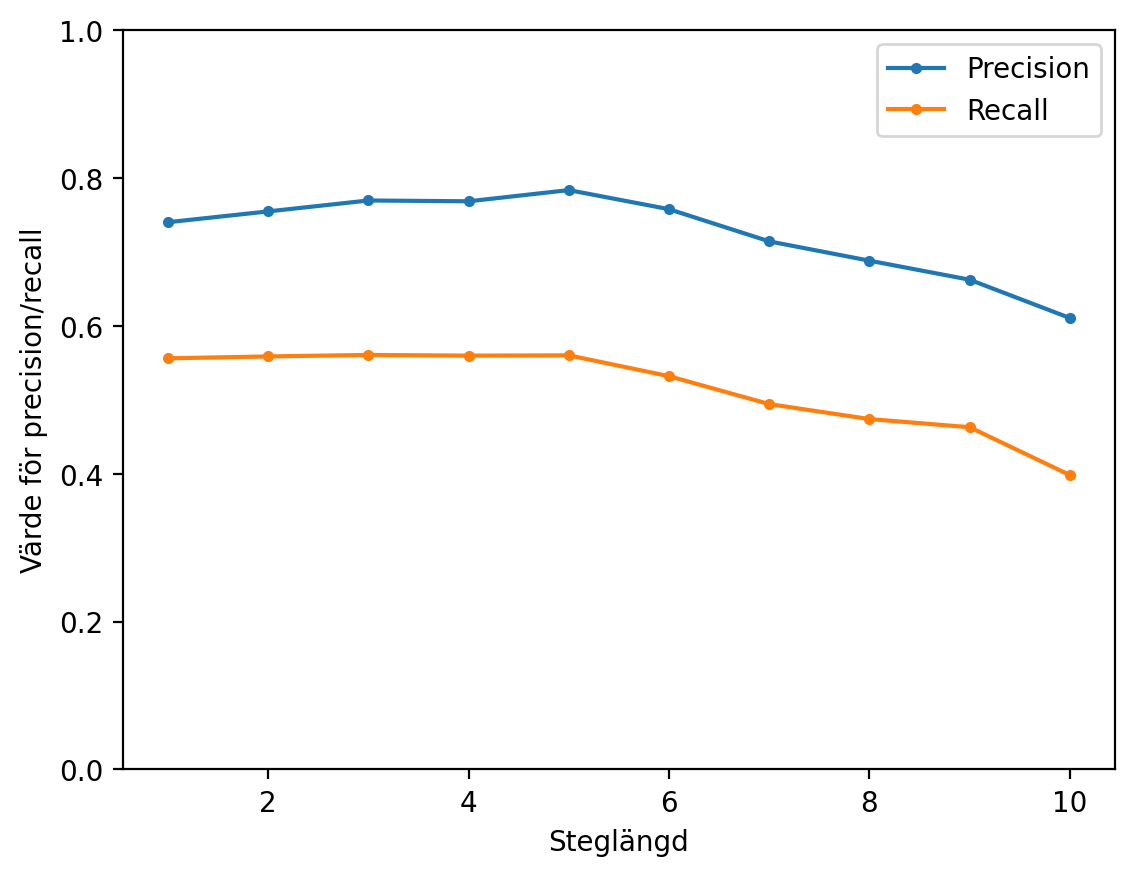


Medelvärde för precision och recall (avg) som funktion av step_size

--------------------------------------------------



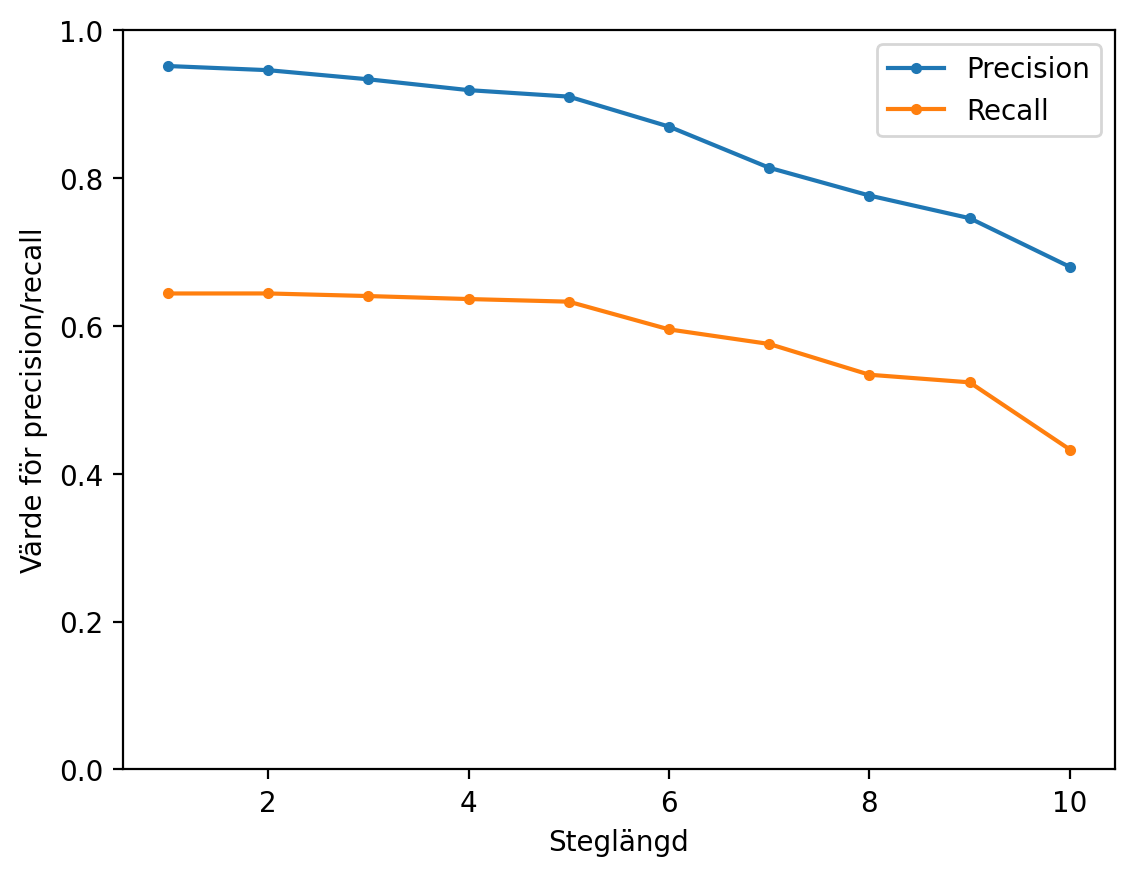


Medelvärde för precision och recall (pred) som funktion av step_size

--------------------------------------------------



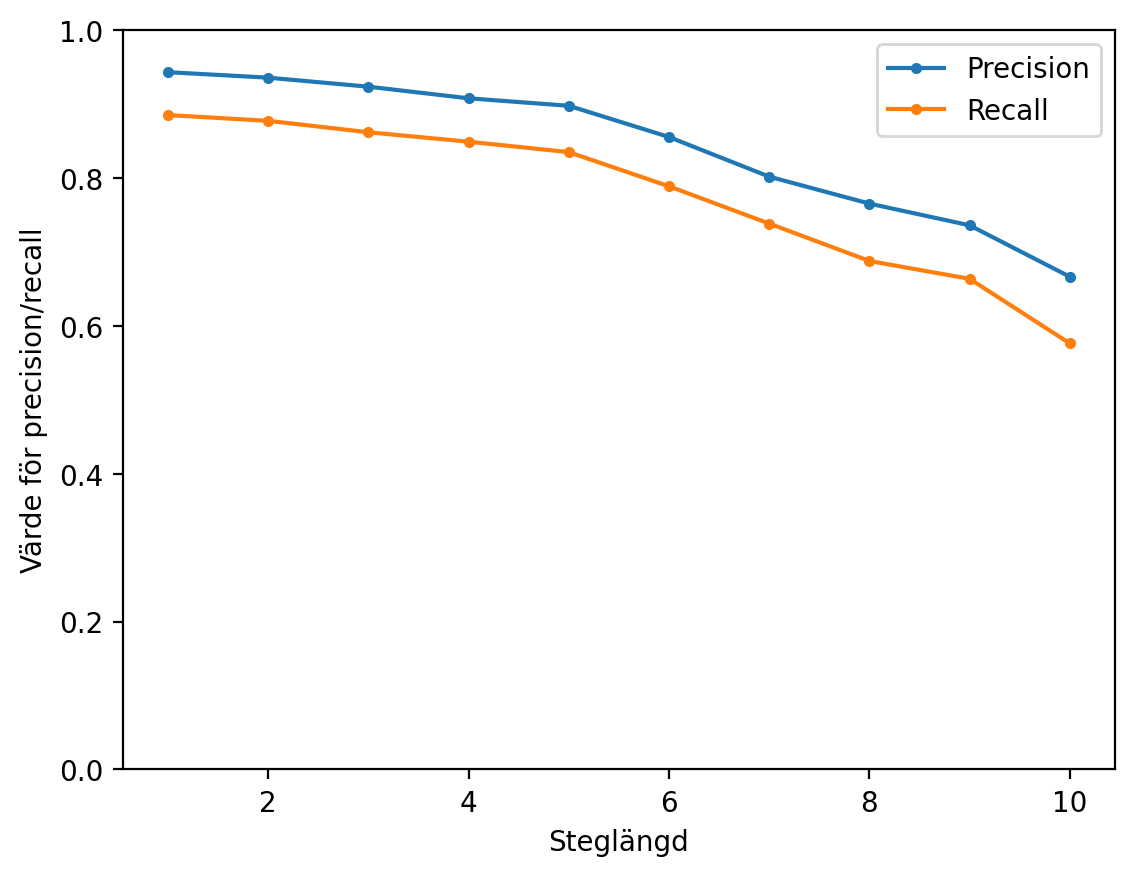


Medelvärde för precision och recall (best) som funktion av step_size

--------------------------------------------------



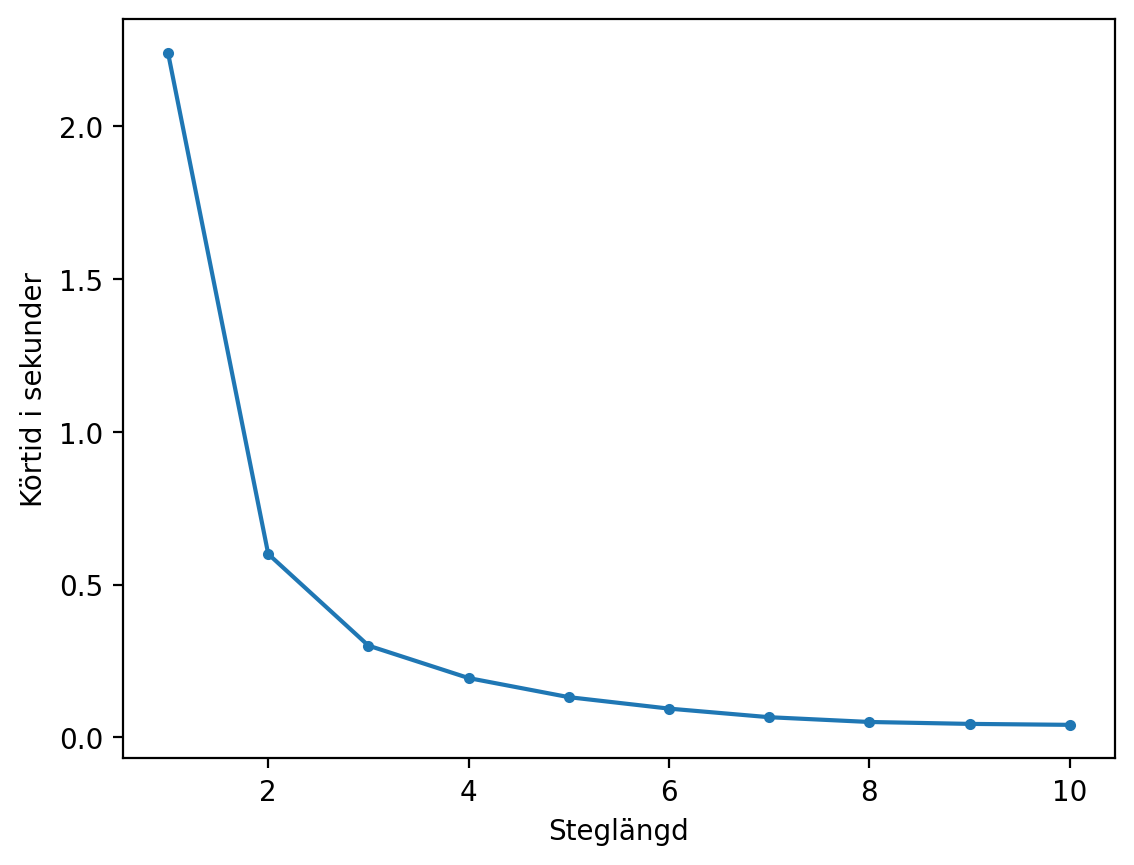


Körtid som funktion av step_size

--------------------------------------------------



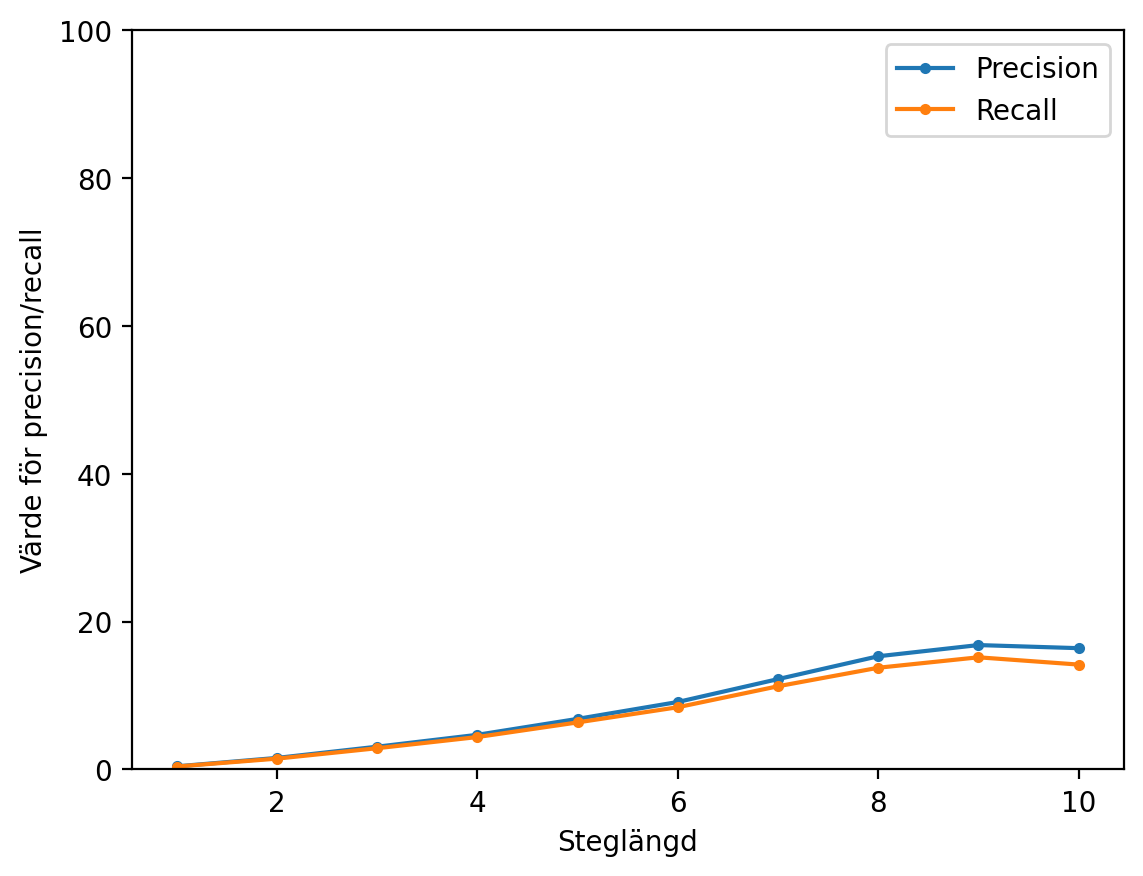


P&R (best) delat på körtid som funktion av step_size

--------------------------------------------------



'\nplt.plot(x, y1, "-b", label="sine")\nplt.plot(x, y2, "-r", label="cosine")\nplt.title("Sports Watch Data")\nplt.xlabel("Average Pulse")\nplt.ylabel("Calorie Burnage")\nplt.legend(loc="upper left")\nplt.ylim(-1.5, 2.0)\n'

In [ ]:
resolution = 200
limit = 10

# Omformatering
p_avg_avalue_list = []
p_pred_avalue_list = []
p_best_avalue_list = []

r_avg_avalue_list = []
r_pred_avalue_list = []
r_best_avalue_list = []

size_axis = [description["step_size"] for description, result in all_results][:limit]
speed_list = [description["average_time"]**1 for description, result in all_results][:limit]

for description, result in all_results:
  PnR_avg_list = [PnR_avg for PnR_avg, PnR_pred, PnR_best in result]
  PnR_pred_list = [PnR_pred for PnR_avg, PnR_pred, PnR_best in result]
  PnR_best_list = [PnR_best for PnR_avg, PnR_pred, PnR_best in result]

  p_avg_avalue, r_avg_avalue = (np.average([precision for precision, recall in PnR_avg_list]), np.average([recall for precision, recall in PnR_avg_list]))
  p_pred_avalue, r_pred_avalue = (np.average([precision for precision, recall in PnR_pred_list]), np.average([recall for precision, recall in PnR_pred_list]))
  p_best_avalue, r_best_avalue = (np.average([precision for precision, recall in PnR_best_list]), np.average([recall for precision, recall in PnR_best_list]))


  p_avg_avalue_list.append(p_avg_avalue)
  p_pred_avalue_list.append(p_pred_avalue)
  p_best_avalue_list.append(p_best_avalue)

  r_avg_avalue_list.append(r_avg_avalue)
  r_pred_avalue_list.append(r_pred_avalue)
  r_best_avalue_list.append(r_best_avalue)

p_avg_avalue_list = p_avg_avalue_list[:limit]
p_pred_avalue_list = p_pred_avalue_list[:limit]
p_best_avalue_list = p_best_avalue_list[:limit]

r_avg_avalue_list = r_avg_avalue_list[:limit]
r_pred_avalue_list = r_pred_avalue_list[:limit]
r_best_avalue_list = r_best_avalue_list[:limit]



plt.figure(dpi=resolution)
plt.plot(size_axis, p_avg_avalue_list, label="Precision", marker=".")
plt.plot(size_axis, r_avg_avalue_list, label="Recall", marker=".")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.xlabel("Steglängd")
plt.ylabel("Värde för precision/recall")
plt.show()
caption("Medelvärde för precision och recall (avg) som funktion av step_size")

plt.figure(dpi=resolution)
plt.plot(size_axis, p_pred_avalue_list, label="Precision", marker=".")
plt.plot(size_axis, r_pred_avalue_list, label="Recall", marker=".")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.xlabel("Steglängd")
plt.ylabel("Värde för precision/recall")
plt.show()
caption("Medelvärde för precision och recall (pred) som funktion av step_size")

plt.figure(dpi=resolution)
plt.plot(size_axis, p_best_avalue_list, label="Precision", marker=".")
plt.plot(size_axis, r_best_avalue_list, label="Recall", marker=".")
plt.legend(loc="upper right")
plt.ylim(0, 1.0)
plt.xlabel("Steglängd")
plt.ylabel("Värde för precision/recall")
plt.show()
caption("Medelvärde för precision och recall (best) som funktion av step_size")

plt.figure(dpi=resolution)
plt.plot(size_axis, speed_list, label="Körtid", marker=".")
#plt.legend(loc="upper right")
#plt.ylim(0, 1.0)
plt.xlabel("Steglängd")
plt.ylabel("Körtid i sekunder")
plt.show()
caption("Körtid som funktion av step_size")


p_over_speed = [p_best_avalue_list[i] / speed_list[i] for i in range(len(speed_list))]
r_over_speed = [r_best_avalue_list[i] / speed_list[i] for i in range(len(speed_list))]

plt.figure(dpi=resolution)
plt.plot(size_axis, p_over_speed, label="Precision", marker=".")
plt.plot(size_axis, r_over_speed, label="Recall", marker=".")
plt.legend(loc="upper right")
plt.ylim(0, 100.0)
plt.xlabel("Steglängd")
plt.ylabel("Värde för precision/recall")
plt.show()
caption("P&R (best) delat på körtid som funktion av step_size")

'''
plt.plot(x, y1, "-b", label="sine")
plt.plot(x, y2, "-r", label="cosine")
plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.legend(loc="upper left")
plt.ylim(-1.5, 2.0)
'''

###Gammal

In [ ]:
# Gammal

print("=== RESULTAT ===")

w = 15 # w för width
print("\nMedelvärde och median för de olika försöken:")
print("\nSteglängd".ljust(w), " Medelvärde".ljust(w), " Median".ljust(w))
for description, result in all_results:
  average_result = round(np.mean(result))
  median_result = int(np.median(result))
  step_size = description["step_size"]
  print(str(step_size).ljust(w), str(average_result).ljust(w), str(median_result).ljust(w))

print()
plt.figure(dpi=200)
plt.boxplot([result for description, result in all_results], whis=10**5)
plt.show()
print("\nFig. 1: Lådagram över resultaten\n\n"+50*"-"+"\n")

plt.figure(dpi=200)
plt.hist(results, bins=30)
plt.show()
print("\nFig. 3: Histogram över resultaten\n\n"+50*"-"+"\n")

'''
best_result = min(results)
index_best = results.index(best_result)
worst_result = max(results)
index_worst = results.index(worst_result)
index_median = results.index(median_result)

print(f"Bästa bild var index {index_best} med ett fel på {best_result}:")
print(f"Sämsta bild var index {index_worst} med ett fel på {worst_result}:")
print(f"Medianbild var index {index_median} med ett fel på {median_result}:")
'''

all_step_size = [description["step_size"] for description, result in all_results]
all_runtime = [description["runtime"] for description, result in all_results]

plt.figure(dpi=200)
plt.plot(all_step_size, all_runtime)
plt.show()
print("\nFig. 3: Histogram över resultaten\n\n"+50*"-"+"\n")